<a href="https://colab.research.google.com/github/Angel-Arroyo-H/alura-data-science-challenge-3/blob/main/Alura_DataScience_Challenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração de dados
Faremos a extração diretamente do repositorio do projeto.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Angel-Arroyo-H/alura-data-science-challenge-3/refs/heads/main/dados/dados_tratados.csv'
dados = pd.read_csv(url)

# Customização de funções

##Funções Graficas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Função para dar titulo aos gráficos
def titulo(variavel:str):
  titulos = {
      'churn': 'Cliente cancelou o contrato?'
      ,'cliente_idoso': 'O cliente tem mais de 65 anos?'
      ,'cliente_tem_parceiro': 'O cliente tem parceiro ou parceira?'
      ,'cliente_tem_dependentes': 'O cliente tem dependentes?'
      ,'servico_telefonico': 'O cliente contratou serviço telefônico?'
      ,'multiplas_linhas': 'O cliente contratou serviço de Multiplas Linhas?'
      ,'assinatura_internet': 'O cliente tem Assinatura de Internet?'
      ,'seguranca_online': 'O cliente contratou serviço de Seguranca Online?'
      ,'backup_online': 'O cliente contratou serviço de Backup Online?'
      ,'protecao_dispositivo': 'O cliente contratou serviço de Protecao de Dispositivo?'
      ,'suporte_tecnico': 'O cliente contratou serviço de Suporte Técnico?'
      ,'tv_a_cabo': 'O cliente contratou serviço de TV a Cabo?'
      ,'streaming_filmes': 'O cliente contratou serviço de Streaming de Filmes?'
      ,'contrato': 'Qual o tipo de contrato do cliente?'
      ,'fatura_online': 'O cliente contratou serviço de Fatura Online?'
      ,'forma_pagamento': 'Qual a forma de pagamento do cliente?'
      ,'cliente_masculino': 'O cliente é do sexo masculino?'
      ,'meses_contrato': 'Boxplot: Quantidade de meses de contrato'
      ,'faturamento_mensal': 'Boxplot: Faturamento mensal por cliente'
      ,'faturamento_total': 'Boxplot: Faturamento total por cliente'
      ,'contas_diarias': 'Boxplot: Faturamento diário por cliente'
  }
  return titulos[variavel]

# Funções para customizar os gráficos.
def plot_rosca(df,variavel):
  # Calcular a proporção de usuários que deram churn
  proporcao = df.value_counts(variavel,normalize=True,dropna=False)

  # Configurações do gráfico de rosca
  fig, ax = plt.subplots(figsize=(4, 4), facecolor='white')
  ax.set_facecolor(sns.color_palette("rocket")[5])

  # Plotar o gráfico de rosca
  cores = sns.color_palette("rocket")[1:] # [sns.color_palette("rocket")[1], sns.color_palette("rocket")[4]]
  wedges, texts, autotexts = ax.pie(
      proporcao
      ,labels=[str(c).replace('True','Sim').replace('False','Não') for c in proporcao.index]
      ,autopct='%1.1f%%'
      ,startangle=180
      ,wedgeprops=dict(width=0.4, edgecolor=None)
      ,pctdistance=0.8
      ,colors=cores
  )
  # Adicionar rótulos e título
  plt.title(titulo(variavel), fontsize=13, family='sans-serif', color='#2a3f5f')

  # Configurar rótulos e porcentagens com as cores especificadas
  for text, autotext, color in zip(texts, autotexts, cores):
      text.set_color(color)
      text.set_fontsize(10)
      autotext.set_color('white')
      autotext.set_fontsize(10)

  return fig

# Gráfico de correlacao
def plot_correlacao(correlacao, figsize=(10, 8)):
  mascara = np.zeros_like(correlacao, dtype=bool)
  mascara[np.triu_indices_from(mascara)] = True

  # Configurar a figura do matplotlib
  f, ax = plt.subplots(figsize=figsize)

  # Gerar o mapa de calor (heatmap)
  cmap = sns.diverging_palette(15, 280, s=80, as_cmap=True) # 340
  #cmap = sns.color_palette("coolwarm_r", as_cmap=True)

  sns.heatmap(correlacao, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
              square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

  # Exibir o mapa de calor (heatmap)
  return plt

# Função para transformar cores no formato sns.color_palette para hex
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]*255),int(rgb[1]*255),int(rgb[2]*255))

# Função para dar titulo aos gráficos
def titulo(variavel:str):
  titulos = {
      'churn': 'Cliente cancelou contrato?'
      ,'cliente_idoso': 'O cliente tem mais de 65 anos?'
      ,'cliente_tem_parceiro': 'O cliente tem parceiro ou parceira?'
      ,'cliente_tem_dependentes': 'O cliente tem dependentes?'
      ,'servico_telefonico': 'O cliente contratou serviço telefônico?'
      ,'multiplas_linhas': 'O cliente contratou serviço de Multiplas Linhas?'
      ,'assinatura_internet': 'O cliente tem Assinatura de Internet?'
      ,'seguranca_online': 'O cliente contratou serviço de Seguranca Online?'
      ,'backup_online': 'O cliente contratou serviço de Backup Online?'
      ,'protecao_dispositivo': 'O cliente contratou serviço de Protecao de Dispositivo?'
      ,'suporte_tecnico': 'O cliente contratou serviço de Suporte Técnico?'
      ,'tv_a_cabo': 'O cliente contratou serviço de TV a Cabo?'
      ,'streaming_filmes': 'O cliente contratou serviço de Streaming de Filmes?'
      ,'contrato': 'Qual o tipo de contrato do cliente?'
      ,'fatura_online': 'O cliente contratou serviço de Fatura Online?'
      ,'forma_pagamento': 'Qual a forma de pagamento do cliente?'
      ,'cliente_masculino': 'O cliente é do sexo masculino?'
      ,'meses_contrato': 'Boxplot: Quantidade de meses de contrato'
      ,'faturamento_mensal': 'Boxplot: Faturamento mensal por cliente'
      ,'faturamento_total': 'Boxplot: Faturamento total por cliente'
      ,'contas_diarias': 'Boxplot: Faturamento diário por cliente'
  }
  return titulos[variavel]

def plot_churn_por_variavel(df,variavel:str):
  is_numeric = False if df.dtypes.loc[variavel] in ['bool','object'] else True
  parametros_comuns = {
      'width':600
      ,'height':400
      ,'color_discrete_map':{
          'Sim': rgb_to_hex(sns.color_palette("rocket")[4])
          ,'Não': rgb_to_hex(sns.color_palette("rocket")[1])
      }
      ,'template':'plotly_white'
      ,'title':titulo(variavel)
  }
  if is_numeric:
    fig = px.box(
        df
        ,x=df[variavel].replace({True:'Sim',False:'Não'})#variavel
        ,color=df['churn'].map({True:'Sim',False:'Não'})
        ,labels={variavel:'','churn':'Churn','y':''}
        ,**parametros_comuns
    )
    fig.update_layout(legend_traceorder='reversed')
  else:
    fig = px.histogram(
        df
        ,y=df[variavel].replace({True:'Sim',False:'Não'})#variavel
        ,text_auto=True
        ,barmode='group'
        ,barnorm='percent'
        ,color=df['churn'].map({True:'Sim',False:'Não'})
        ,labels={variavel:'','churn':'Churn','y':''}
        ,**parametros_comuns
    )
    fig.update_traces(texttemplate='%{x:.1f}%', textposition='outside')
    fig.update_xaxes(
        showticklabels=False
        ,ticks=''
        ,showgrid=False
        ,range=[0, 100]
    )
    fig.update_layout(
        annotations=[# Adicionar subtítulo com annotations
            dict(
                x=0.31,  # posição horizontal (0 a 1 relativas à figura)
                y=1.15,  # posição vertical (1 é o topo do gráfico)
                xref='paper',
                yref='paper',
                showarrow=False,
                text='Percentual de Churn por Categoria',#variavel.replace('_',' ').title(),
                font=dict(size=15, color='#2a3f5f'),
                xanchor='center',
            )
        ]
        ,legend=dict(
            orientation='h',  # legenda horizontal
            y=-0.1,           # posiciona a legenda abaixo do gráfico
            x=0.5,            # centraliza horizontalmente
            xanchor='center', # âncora no centro
            traceorder='reversed',
            font=dict(size=12),
        )
    )
  fig.update_layout(
      xaxis_title=''
      ,showlegend=True
      ,legend_title_text='Churn'
  )
  return fig

## Métricas de Avaliação de Modelos

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [4]:
def intervalo_conf(resultados):
  resumo = pd.DataFrame()
  for k in list(resultados.keys())[2:]:
    media = resultados[k].mean()
    sd = resultados[k].std()
    resumo[f'IC_{k}'] = [(round(media - 2*sd,3), round(media + 2*sd,3))]
  return resumo

def metricas(y_teste, y_previsto):
  metricas = pd.DataFrame()
  metricas['auc_pr'] = [average_precision_score(y_teste, y_previsto)]
  metricas['roc_auc'] = [roc_auc_score(y_teste, y_previsto)]
  metricas['f1'] = [f1_score(y_teste, y_previsto)]
  metricas['precision'] = [precision_score(y_teste, y_previsto,zero_division=0)]
  metricas['recall'] = [recall_score(y_teste, y_previsto, zero_division=0)]
  metricas['accuracy'] = [accuracy_score(y_teste, y_previsto)]
  return metricas

# Correlação dos dados
Observar a correlação que existe entre o Churn e as variveis numéricas vai nos permitir ter uma ideia de quais as variáveis serão mais relevantes para os modelos.

Por outra parte, alguns modelos são sensíveis a variáveis explicativas altamente correlacionadas, o problema é conhecido como multicolinearidade. E impacta na estivativa da variância dos estimadores do modelo.

Usaremos a correlação de Pearson, que equivale ao coeficiente Phi para variáveis binarias, e equivalente ao Ponto-Biserial no caso de comparação de uma variável binária e uma numérica.

In [5]:
correlacao = dados[dados.dtypes[dados.dtypes != object].index.tolist()].corr()
correlacao['churn'].sort_values(ascending=False)

,churn
churn,1.000000
contas_diarias,0.192858
faturamento_mensal,0.192858
fatura_online,0.191454
cliente_idoso,0.150541
servico_telefonico,0.011691
cliente_masculino,-0.008545
cliente_tem_parceiro,-0.149982
cliente_tem_dependentes,-0.163128
faturamento_total,-0.199484


Observamos correlações significativas entre o Churn e a maioria de variáveis numéricas (incluindo as variâveis booleanas), exeto as variâveis servico_telefonico e cliente_masculino.

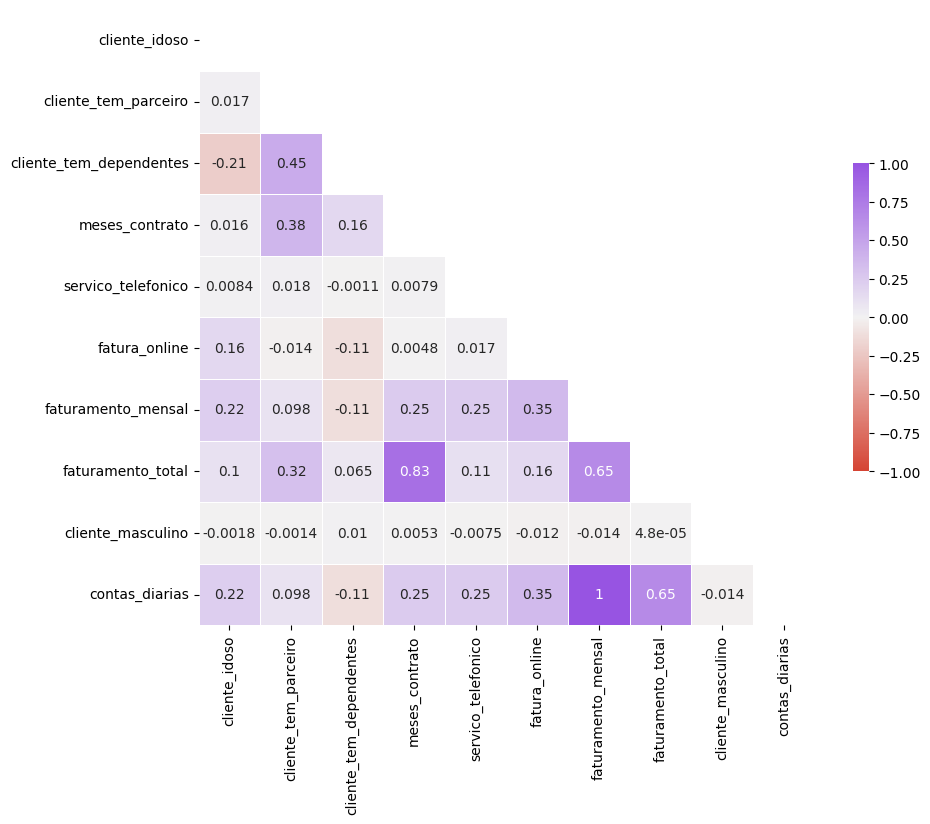

In [6]:
plot_correlacao(dados[dados.dtypes[dados.dtypes != object].index.tolist()[1:]].corr());

As maiores correlações são geradas pelas variaveis contas_diarias e faturamento total. Como contas_diarias foi calculada diretamente do Faturamento Mensal ambas trazem as mesma informação, decidimos remover contas_diarias. Enquanto a faturamento_total ela tem uma correlação muito alta com meses_contrato e faturamento_mensal. Omitiremos faturamento_total da modelagem para evitar problemas de multicolinearidade.

In [7]:
dados.drop(['contas_diarias','faturamento_total'],axis=1,inplace=True)

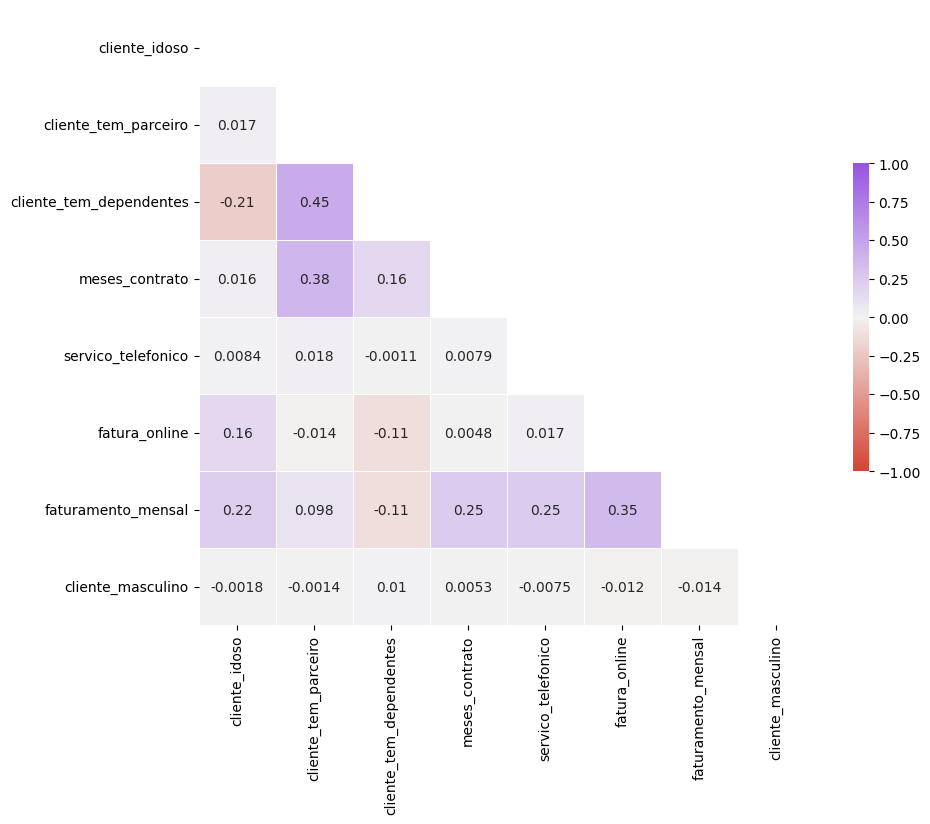

In [8]:
plot_correlacao(
    dados[dados.dtypes[dados.dtypes != object].index.tolist()[1:]].corr()
);

# Análises direcionadas
A seguir alguns graficos para observar a distribuição das variáves numéricas nas categorias de Churn de Clientes.

## Churn vs Faturamento Mensal

In [9]:
plot_churn_por_variavel(dados,'faturamento_mensal')

Os Clientes que deram Churn tinham um faturamento mensal maior comparado com os Clientes que permanecem. A distribuição do faturamento mensal de clientes que permanecem tem uma variabilidad maior.

## Churn vs Meses de Contrato

In [10]:
plot_churn_por_variavel(dados,'meses_contrato')

Podemos ver que clientes que deram Churn apresentam um Tempo de Contrato menor comparado com os Clientes que permanecem. O 75% dos clientes que permanecem tem antiguedade maior a 15 meses. Enquanto 75% dos clientes que deram Churn tem um Tempo de Contrato inferior a 30 meses.

# Preparação dos Dados

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    7032 non-null   bool   
 1   cliente_idoso            7032 non-null   bool   
 2   cliente_tem_parceiro     7032 non-null   bool   
 3   cliente_tem_dependentes  7032 non-null   bool   
 4   meses_contrato           7032 non-null   int64  
 5   servico_telefonico       7032 non-null   bool   
 6   multiplas_linhas         7032 non-null   object 
 7   assinatura_internet      7032 non-null   object 
 8   seguranca_online         7032 non-null   object 
 9   backup_online            7032 non-null   object 
 10  protecao_dispositivo     7032 non-null   object 
 11  suporte_tecnico          7032 non-null   object 
 12  tv_a_cabo                7032 non-null   object 
 13  streaming_filmes         7032 non-null   object 
 14  contrato                

## Encoding
Variáveis categóricas que em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Nesta parte do desafio, informaremos quais são as variáveis explicativas e qual é a variável alvo e transformaremos as variáveis categóricas para formato numérico usando o OneHotEncoder, utilizando o parâmetro drop='if_binary' caso alguma variável tenha apenas 2 categorias.

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
y = dados['churn']
X = dados.drop(['churn'],axis=1)

In [14]:
# Variaveis categóricas
variaveis_nao_numericas = X.columns[(X.dtypes == object)|(X.dtypes == 'bool')].to_list()
variaveis_nao_numericas

['cliente_idoso',
 'cliente_tem_parceiro',
 'cliente_tem_dependentes',
 'servico_telefonico',
 'multiplas_linhas',
 'assinatura_internet',
 'seguranca_online',
 'backup_online',
 'protecao_dispositivo',
 'suporte_tecnico',
 'tv_a_cabo',
 'streaming_filmes',
 'contrato',
 'fatura_online',
 'forma_pagamento',
 'cliente_masculino']

In [15]:
colunas = X.columns
one_hot = make_column_transformer(
    (
        OneHotEncoder(drop='if_binary')
        ,variaveis_nao_numericas
    )
  ,remainder='passthrough'
  ,sparse_threshold=0
)

In [16]:
x=one_hot.fit_transform(X)
x = pd.DataFrame(x,columns=one_hot.get_feature_names_out(colunas))
x.head()

,onehotencoder__cliente_idoso_True,onehotencoder__cliente_tem_parceiro_True,onehotencoder__cliente_tem_dependentes_True,onehotencoder__servico_telefonico_True,onehotencoder__multiplas_linhas_Não,onehotencoder__multiplas_linhas_Sem serviço telefónico,onehotencoder__multiplas_linhas_Sim,onehotencoder__assinatura_internet_DSL,onehotencoder__assinatura_internet_Fibra Ótica,onehotencoder__assinatura_internet_Não,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_True,onehotencoder__forma_pagamento_Cartão de crédito,onehotencoder__forma_pagamento_Cheque,onehotencoder__forma_pagamento_Cheque eletrônico,onehotencoder__forma_pagamento_Transferência bancária,onehotencoder__cliente_masculino_True,remainder__meses_contrato,remainder__faturamento_mensal
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,65.6
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,59.9
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,73.9
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,83.9


Transformamos também a variável alvo, usamos o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

## Verificação da proporção de Evasão (Churn)
Os dados mostram uma Evasão de 26,6%, existe desbalanceamento entre as classes no Churn, pelo que é possível que alguma tecnica de balanceamento seja necessaria a garantir que os modelos aprendam de forma eficaz a partir de ambas as classes, melhorando a precisão e a generalização.

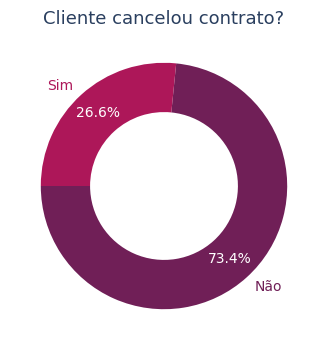

In [18]:
plot_rosca(dados,'churn');

## Normalização dos dados
Decidimos normalizar os dados devido a que modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento. Além disso, modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()
x_normalizado = scaler_min_max.fit_transform(x)
x_normalizado = pd.DataFrame(x_normalizado,columns=x.columns)
x_normalizado.head()

,onehotencoder__cliente_idoso_True,onehotencoder__cliente_tem_parceiro_True,onehotencoder__cliente_tem_dependentes_True,onehotencoder__servico_telefonico_True,onehotencoder__multiplas_linhas_Não,onehotencoder__multiplas_linhas_Sem serviço telefónico,onehotencoder__multiplas_linhas_Sim,onehotencoder__assinatura_internet_DSL,onehotencoder__assinatura_internet_Fibra Ótica,onehotencoder__assinatura_internet_Não,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_True,onehotencoder__forma_pagamento_Cartão de crédito,onehotencoder__forma_pagamento_Cheque,onehotencoder__forma_pagamento_Cheque eletrônico,onehotencoder__forma_pagamento_Transferência bancária,onehotencoder__cliente_masculino_True,remainder__meses_contrato,remainder__faturamento_mensal
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.112676,0.471144
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.112676,0.414428
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.042254,0.553731
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.169014,0.793532
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.028169,0.653234


## Balanceamento dos dados
Exploraremos diversos cenarios, entre eles os que derivam de usar os dados sem balancear, dados balanceados com oversampling e dados balanceados com subsampling.

Nota: O passo de subsampling/oversampling será feito dentro da pipeline junto com o treinamento do modelo.

In [20]:
from imblearn.pipeline import Pipeline as imbpipeline

## Oversampling
Usaremos SMOTE Oversampling. Ele permite o aumento da amostragem de classes minoritárias, sintetizando novos exemplos a partir dos existentes. A técnica é particularmente útil em cenários onde a classe minoritária é crucial para as previsões do modelo, como no nosso caso de Churn de Clientes.

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

## Undersampling
Usamos NearMiss, técnica de undersampling em duas etapas que seleciona amostras da classe majoritária próximas, mas com maior distância média aos vizinhos minoritários, visando equilibrar conjuntos de dados desbalanceados e reduzir sensibilidade a ruído. Selecionamos a versão 3 que é pensada para ser mais robusta a ruidos e outliers.

In [22]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version = 3)

# Modelagem

## Separação dos dados
Usaremos 75% dos dados para o treino e validação do modelo e reservaremos o 25% dos dados para o teste do modelo. Empregaremos validação cruzada com 5 grupos.

In [23]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, test_size = 0.25, random_state = 42)

## Treinamento de Modelos
Usaremos os seguintes modelos/algoritmos:
- DummyClassifier (modelo base)
- Regressão Logistica
- KNN
- Árvore de Decisão
- Floresta Aleatória

Para medir a performance dos modelos usaremos as seguintes métricas:
- Accuracy
- Precision
- Recall
- F1
- ROC AUC

Em paralelo usaremos o RandomizedSearchCV para encontrar os melhores parâmetros para os modelos. A literatura sugere que a Average Precision (AUC-PR) é a métrica mais adequada em problemas com forte desbalanceamento (como Churn) porque foca na performance das classes positivas. Nesse sentido, usaremos ela como métrica a ser otimizada para obter os melhores parâmetros dos modelos.

Para garantizar que a separação de dados é correta usaremos validação cruzada em todos os modelos. E a comparação de resultados entre treino e teste permitirá verificar a ausencia de Overfit.

In [24]:
precision = make_scorer(precision_score, zero_division=0)
recall = make_scorer(recall_score, zero_division=0)

scoring = {
  'auc_pr': 'average_precision' # Usaremos essa metrica na otimização de parametros
  ,'roc_auc': 'roc_auc'
  ,'f1': 'f1'
  ,'precision': precision
  ,'recall': recall
  ,'accuracy': 'accuracy'
}

### Modelo Base
Usaremos o Dummy Classifier para ter um ponto de partida. O Dummy Classifier é o modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

model_dummy = DummyClassifier(strategy='most_frequent')
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(model_dummy, x_treino, y_treino, cv = skf, scoring = scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.265, 0.267)","(0.5, 0.5)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.733, 0.735)"


In [26]:
model_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [27]:
metricas(y_teste = y_teste, y_previsto = model_dummy.predict(x_teste))

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.265643,0.5,0.0,0.0,0.0,0.734357


Usaremos os resultados acima como ponto de partida para os modelos que desenvolveremos.

### Árvore de Classificação

#### Sem balanceamento

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

modelo_arvore = DecisionTreeClassifier(random_state=42)

# Otimizando os parâmetros da função
grade_parametros = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(
    estimator = modelo_arvore
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}

In [29]:
modelo_arvore_opt = DecisionTreeClassifier(random_state = 42, **random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo_arvore_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.551, 0.678)","(0.812, 0.854)","(0.509, 0.667)","(0.555, 0.686)","(0.439, 0.686)","(0.762, 0.822)"


In [30]:
modelo_arvore_opt.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [31]:
# Métricas para o treino
metricas(y_treino, modelo_arvore_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.495,0.751,0.632,0.622,0.643,0.801


In [32]:
# Métricas para o teste
metricas(y_teste, modelo_arvore_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.468,0.735,0.608,0.585,0.632,0.783


Observamos baixa variabilidade nos resultados na validação cruzada e os intervalos de confiançã das métricas cobrem os valores obtidos no teste. O que evidencia consistencia de resultados e ausencia de overfit no modelo.

#### Com Oversampling

In [33]:
from scipy.stats import randint

pipeline_arvore_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'arvore__max_depth': randint(2, 20)
    ,'arvore__min_samples_split': randint(2, 10)
    ,'arvore__min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_arvore_smote
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'arvore__max_depth': 5,
 'arvore__min_samples_leaf': 4,
 'arvore__min_samples_split': 9}

In [34]:
pipeline_arvore_smote_opt = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])
pipeline_arvore_smote_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_arvore_smote_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.526, 0.612)","(0.796, 0.836)","(0.576, 0.629)","(0.479, 0.556)","(0.684, 0.761)","(0.72, 0.773)"


In [35]:
pipeline_arvore_smote_opt.fit(x_treino, y_treino,)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('arvore',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,
                                        min_samples_split=9,
                                        random_state=42))])

In [36]:
# Métricas para o treino
metricas(y_treino, pipeline_arvore_smote_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.473,0.756,0.627,0.55,0.728,0.77


In [37]:
# Métricas para o teste
metricas(y_teste, pipeline_arvore_smote_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.456,0.747,0.613,0.524,0.737,0.753


#### Com Undersampling

In [38]:
pipeline_arvore_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'arvore__max_depth': randint(2, 20)
    ,'arvore__min_samples_split': randint(2, 10)
    ,'arvore__min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_arvore_nearmiss
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'arvore__max_depth': 4,
 'arvore__min_samples_leaf': 2,
 'arvore__min_samples_split': 6}

In [39]:
pipeline_arvore_nearmiss_opt = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])
pipeline_arvore_nearmiss_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_arvore_nearmiss_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.512, 0.601)","(0.747, 0.814)","(0.536, 0.63)","(0.455, 0.577)","(0.56, 0.788)","(0.706, 0.781)"


In [40]:
pipeline_arvore_nearmiss_opt.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('arvore',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=2,
                                        min_samples_split=6,
                                        random_state=42))])

In [41]:
# Métricas para o treino
metricas(y_treino, pipeline_arvore_nearmiss_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.46,0.74,0.609,0.55,0.681,0.767


In [42]:
# Métricas para o teste
metricas(y_teste, pipeline_arvore_nearmiss_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.452,0.734,0.601,0.544,0.67,0.763


### Classificador de K Vizinhos (KNeighbors)

#### Sem balanceamento

In [45]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

# Otimizando os parâmetros da função
grade_parametros = {
    'n_neighbors': randint(3, 30),            # número de vizinhos
    'weights': ['uniform', 'distance'],       # ponderação dos vizinhos
    'p': randint(1, 3),                       # métrica Minkowski (1 = Manhattan, 2 = Euclidiana)
}

random_search = RandomizedSearchCV(
    estimator = modelo_knn
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

In [46]:
modelo_knn_opt = KNeighborsClassifier(**random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(modelo_knn_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.543, 0.612)","(0.805, 0.837)","(0.554, 0.602)","(0.565, 0.616)","(0.522, 0.612)","(0.769, 0.791)"


In [47]:
modelo_knn_opt.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=29, p=1)

In [48]:
# Métricas para o treino
metricas(y_treino, modelo_knn_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.486,0.738,0.617,0.63,0.605,0.8


In [49]:
# Métricas para o teste
metricas(y_teste, modelo_knn_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.444,0.712,0.576,0.574,0.578,0.774


#### Com Oversampling

In [50]:
pipeline_knn_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('knn', KNeighborsClassifier())
])

# Otimizando os parâmetros da função
grade_parametros = {
    'knn__n_neighbors': randint(3, 30),            # número de vizinhos
    'knn__weights': ['uniform', 'distance'],       # ponderação dos vizinhos
    'knn__p': randint(1, 3),                       # métrica Minkowski (1 = Manhattan, 2 = Euclidiana)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_knn_smote
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'knn__n_neighbors': 29, 'knn__p': 1, 'knn__weights': 'uniform'}

In [51]:
pipeline_knn_smote_opt = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('knn', KNeighborsClassifier())
])
pipeline_knn_smote_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_knn_smote_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.529, 0.597)","(0.8, 0.832)","(0.585, 0.611)","(0.463, 0.487)","(0.778, 0.837)","(0.7, 0.723)"


In [52]:
pipeline_knn_smote_opt.fit(x_treino, y_treino)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=29, p=1))])

In [53]:
# Métricas para o treino
metricas(y_treino, pipeline_knn_smote_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.473,0.778,0.637,0.507,0.856,0.741


In [54]:
# Métricas para o teste
metricas(y_teste, pipeline_arvore_smote_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.456,0.747,0.613,0.524,0.737,0.753


#### Com Undersampling

In [55]:
pipeline_knn_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('knn', KNeighborsClassifier())
])

# Otimizando os parâmetros da função
grade_parametros = {
    'knn__n_neighbors': randint(3, 30),            # número de vizinhos
    'knn__weights': ['uniform', 'distance'],       # ponderação dos vizinhos
    'knn__p': randint(1, 3),                       # métrica Minkowski (1 = Manhattan, 2 = Euclidiana)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_knn_nearmiss
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'knn__n_neighbors': 29, 'knn__p': 1, 'knn__weights': 'uniform'}

In [56]:
pipeline_knn_nearmiss_opt = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('knn', KNeighborsClassifier())
])
pipeline_knn_nearmiss_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_knn_nearmiss_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.407, 0.538)","(0.729, 0.785)","(0.524, 0.585)","(0.43, 0.478)","(0.66, 0.765)","(0.675, 0.717)"


In [57]:
pipeline_knn_nearmiss_opt.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('knn', KNeighborsClassifier(n_neighbors=29, p=1))])

In [58]:
# Métricas para o treino
metricas(y_treino, pipeline_knn_nearmiss_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.419,0.719,0.576,0.477,0.727,0.716


In [59]:
# Métricas para o teste
metricas(y_teste, pipeline_knn_nearmiss_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.403,0.707,0.56,0.454,0.732,0.695


### Regressão Logística

#### Sem balanceamento

In [52]:
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression(random_state=42)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(modelo_rl, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_fit_time,IC_score_time,IC_test_precision,IC_test_recall,IC_test_f1,IC_test_accuracy
0,"(0.035, 0.094)","(-0.0, 0.05)","(0.63, 0.673)","(0.485, 0.595)","(0.554, 0.626)","(0.79, 0.812)"


In [53]:
modelo_rl.fit(x_treino, y_treino)

LogisticRegression(random_state=42)

In [54]:
y_treino_previsto = modelo_rl.predict(x_treino)
print(classification_report(y_treino, y_treino_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3872
           1       0.66      0.55      0.60      1402

    accuracy                           0.81      5274
   macro avg       0.75      0.72      0.73      5274
weighted avg       0.80      0.81      0.80      5274



In [55]:
y_previsto = modelo_rl.predict(x_teste)
print(classification_report(y_teste, y_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.64      0.52      0.58       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



#### Com Oversampling

In [56]:
modelo_rl_smote = LogisticRegression(random_state=42)
pipeline_rl_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('regressao_logistica', modelo_rl_smote)
])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(pipeline_rl_smote, x_treino, y_treino, cv = skf, scoring = scoring)
intervalo_conf(cv_resultados)

,IC_fit_time,IC_score_time,IC_test_precision,IC_test_recall,IC_test_f1,IC_test_accuracy
0,"(-0.036, 0.345)","(-0.007, 0.065)","(0.498, 0.551)","(0.704, 0.833)","(0.589, 0.657)","(0.733, 0.773)"


In [57]:
pipeline_rl_smote.fit(x_treino, y_treino)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('regressao_logistica', LogisticRegression(random_state=42))])

In [58]:
y_treino_previsto = pipeline_rl_smote.predict(x_treino)
print(classification_report(y_treino, y_treino_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      3872
           1       0.53      0.79      0.64      1402

    accuracy                           0.76      5274
   macro avg       0.72      0.77      0.73      5274
weighted avg       0.81      0.76      0.77      5274



In [59]:
y_previsto = pipeline_rl_smote.predict(x_teste)
print(classification_report(y_teste, y_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1291
           1       0.51      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.80      0.75      0.76      1758



#### Com Undersampling

In [60]:
modelo_rl_nearmiss = LogisticRegression(random_state=42)
pipeline_rl_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('regressao_logistica', modelo_rl_smote)
])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(pipeline_rl_nearmiss, x_treino, y_treino, cv = skf, scoring = scoring)
intervalo_conf(cv_resultados)

,IC_fit_time,IC_score_time,IC_test_precision,IC_test_recall,IC_test_f1,IC_test_accuracy
0,"(0.068, 0.556)","(0.024, 0.041)","(0.514, 0.586)","(0.621, 0.738)","(0.575, 0.64)","(0.745, 0.788)"


In [61]:
pipeline_rl_nearmiss.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('regressao_logistica', LogisticRegression(random_state=42))])

In [62]:
y_treino_previsto = pipeline_rl_nearmiss.predict(x_treino)
print(classification_report(y_treino, y_treino_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3872
           1       0.58      0.68      0.62      1402

    accuracy                           0.78      5274
   macro avg       0.73      0.75      0.74      5274
weighted avg       0.80      0.78      0.79      5274



In [63]:
y_previsto = pipeline_rl_nearmiss.predict(x_teste)
print(classification_report(y_teste, y_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1291
           1       0.57      0.67      0.62       467

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.79      0.78      0.78      1758



### Floresta Aleatória

#### Sem balanceamento

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

modelo_floresta = RandomForestClassifier(random_state=42)

grade_parametros = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(
    estimator = modelo_floresta
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=2
    ,random_state=42
    ,refit='f1' # Set refit to 'f1'
    ,verbose=False
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [70]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [71]:
modelo_floresta_opt = RandomForestClassifier(random_state=42,**random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(modelo_floresta_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_fit_time,IC_score_time,IC_test_precision,IC_test_recall,IC_test_f1,IC_test_accuracy
0,"(0.561, 1.339)","(-0.003, 0.135)","(0.607, 0.712)","(0.434, 0.589)","(0.517, 0.633)","(0.779, 0.821)"


In [72]:
modelo_floresta_opt.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [73]:
y_treino_previsto = modelo_floresta_opt.predict(x_treino)
print(classification_report(y_treino, y_treino_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3872
           1       0.75      0.62      0.68      1402

    accuracy                           0.84      5274
   macro avg       0.81      0.77      0.79      5274
weighted avg       0.84      0.84      0.84      5274



In [74]:
y_previsto = modelo_floresta_opt.predict(x_teste)
print(classification_report(y_teste, y_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.64      0.51      0.57       467

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758



#### Com Oversampling

In [ ]:
modelo_rl_smote = LogisticRegression(random_state=42)
pipeline_rl_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('regressao_logistica', modelo_rl_smote)
])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(pipeline_rl_smote, x_treino, y_treino, cv = skf, scoring = scoring)
intervalo_conf(cv_resultados)

,IC_fit_time,IC_score_time,IC_test_precision,IC_test_recall,IC_test_f1,IC_test_accuracy
0,"(0.261, 0.438)","(0.034, 0.092)","(0.498, 0.551)","(0.704, 0.833)","(0.589, 0.657)","(0.733, 0.773)"


In [ ]:
pipeline_rl_smote.fit(x_treino, y_treino)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('regressao_logistica', LogisticRegression(random_state=42))])

In [ ]:
y_treino_previsto = pipeline_rl_smote.predict(x_treino)
print(classification_report(y_treino, y_treino_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      3872
           1       0.53      0.79      0.64      1402

    accuracy                           0.76      5274
   macro avg       0.72      0.77      0.73      5274
weighted avg       0.81      0.76      0.77      5274



In [ ]:
y_previsto = pipeline_rl_smote.predict(x_teste)
print(classification_report(y_teste, y_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1291
           1       0.51      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.80      0.75      0.76      1758



#### Com Undersampling

In [ ]:
modelo_rl_nearmiss = LogisticRegression(random_state=42)
pipeline_rl_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('regressao_logistica', modelo_rl_smote)
])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(pipeline_rl_nearmiss, x_treino, y_treino, cv = skf, scoring = scoring)
intervalo_conf(cv_resultados)

,IC_fit_time,IC_score_time,IC_test_precision,IC_test_recall,IC_test_f1,IC_test_accuracy
0,"(0.065, 0.471)","(0.007, 0.047)","(0.514, 0.586)","(0.621, 0.738)","(0.575, 0.64)","(0.745, 0.788)"


In [ ]:
pipeline_rl_nearmiss.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('regressao_logistica', LogisticRegression(random_state=42))])

In [ ]:
y_treino_previsto = pipeline_rl_nearmiss.predict(x_treino)
print(classification_report(y_treino, y_treino_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3872
           1       0.58      0.68      0.62      1402

    accuracy                           0.78      5274
   macro avg       0.73      0.75      0.74      5274
weighted avg       0.80      0.78      0.79      5274



In [ ]:
y_previsto = pipeline_rl_nearmiss.predict(x_teste)
print(classification_report(y_teste, y_previsto, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1291
           1       0.57      0.67      0.62       467

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.79      0.78      0.78      1758

